## Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

### Reading Data

In [2]:
tip_data = pd.read_csv("tips.csv")
tip_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Observing data


In [3]:
tip_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [4]:
tip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
tip_data["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [6]:
# To predict tip amount we can use all features in dataset.

## Preparing data (missing and categoric values)

In [7]:
tip_data.isnull().sum() # in our data there is no missing value.

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
# changing dtype object to category
cols = ['sex', 'smoker', 'day', 'time']
enc = OrdinalEncoder()
for i in cols:
    data = tip_data[[i]]
    ordinale_category = enc.fit_transform(data)
    tip_data[i] = ordinale_category
    

In [9]:
tip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    float64
 3   smoker      244 non-null    float64
 4   day         244 non-null    float64
 5   time        244 non-null    float64
 6   size        244 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.5 KB


In [10]:
tip_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0.0,0.0,2.0,0.0,2
1,10.34,1.66,1.0,0.0,2.0,0.0,3
2,21.01,3.50,1.0,0.0,2.0,0.0,3
3,23.68,3.31,1.0,0.0,2.0,0.0,2
4,24.59,3.61,0.0,0.0,2.0,0.0,4


In [11]:
tip_data["day"].value_counts()

1.0    87
2.0    76
3.0    62
0.0    19
Name: day, dtype: int64

## Deciding models and functions


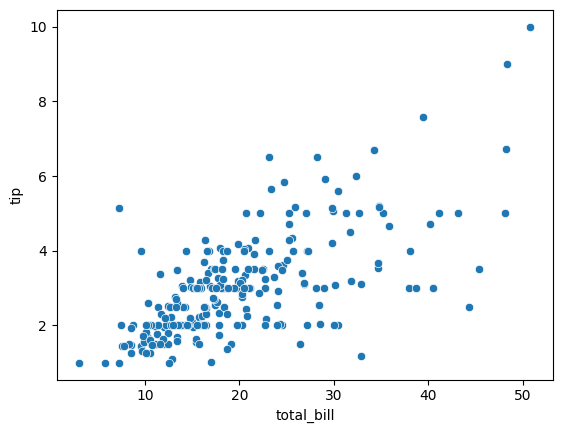

In [12]:
sns.scatterplot(tip_data, x = "total_bill", y = "tip")
plt.show()

<AxesSubplot: >

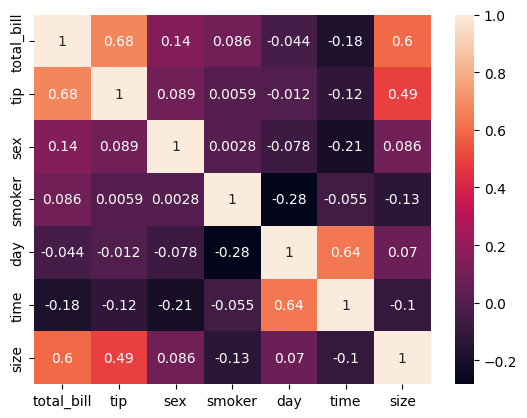

In [13]:
sns.heatmap(data = tip_data.corr(), annot = True)

## Train-Validation-Test


In [15]:
from sklearn.model_selection import train_test_split
X = tip_data.drop("tip", axis = 1)
y = tip_data["tip"]

## Machine Learning Algorithm

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_models(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate a random forest regressor
    rf = RandomForestRegressor(n_estimators=300, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f"Random Forest RMSE: {rmse:.2f}")

    # Train and evaluate a linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f"Linear Regression RMSE: {rmse:.2f}")
    
    from sklearn.svm import SVR

    # Train and evaluate a support vector machine
    svm = SVR(kernel="linear")
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f"SVM RMSE: {rmse:.2f}")

In [17]:
evaluate_models(X, y)

Random Forest RMSE: 0.97
Linear Regression RMSE: 0.83
SVM RMSE: 0.83
